In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

Nossos dados contém o valor médio da variação do nivel do mar ```CSIRO Adjusted Sea Level ```  do ano ``` Year``` 1880 até 2013.

Vamos utilizar os valores medidos para prever a qual será a variação do nivel do mar até 2050. Para isso iremos utilizar um modelo de regressão linear e avaliar os resultados

In [130]:
df = pd.read_csv("https://raw.githubusercontent.com/tnorio/Data-Analysis-with-Python-freecodecamp.org/main/Sea%20Level%20Predictor/epa-sea-level.csv")

In [131]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Para nosso modelo iremos utilizar somente as variáveis ```Year``` e ```CSIRO Adjusted Sea Level```

Primeiro vamos plotar um scatter plot para observar o comportamento dos dados

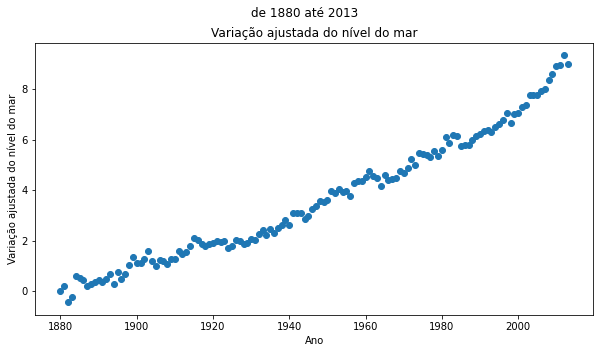

In [132]:
fig, axs = plt.subplots(figsize=(10,5))
plt.scatter(x=df["Year"],y=df["CSIRO Adjusted Sea Level"])

#legendas
plt.title("Variação ajustada do nível do mar")
plt.suptitle("de 1880 até 2013")
axs.set_xlabel("Ano")
axs.set_ylabel("Variação ajustada do nível do mar");

plt.savefig("scatterr data.png")

Podemos observar que a alteração do nível do mar vem ocorrendo de forma quase linear. Por isso vamos utilizar um modelo linear para tentar prever alterações futuras.

# Regressão Linear
A regressão linear é um modelo relativamente simples, oque pode ser ruim por não conseguir uma boa performance em problemas mais complexos, por outro lado sua vantagem é ser de fácil explicação.

## Regressão Linear
Com um modelo de regressão linear é um metodo estatístico usado para prever a relação entre duas variáveis. Queremos prever o quanto de alteração da variável dependente ou preditora ```X``` influencia no valor da variável independente ou de resposta```Y```

##Equação
Um modelo de regressão linear é composto pela seguinte equação:

$ \hat{y}_i = \beta_0 + \beta_1*x_i +ϵ $


* $\hat{y}_i$: Valor que vamos prever. A variável dependente
* $x_i$: váriavel de entrada / independente
* $\beta_0$: *intercept*, é ponto que corta o eixo y quando x=0.
* $\beta_1$: coeficiente angular, define a angulação da reta. Quanto mais inclinada maior a influencia que a alteração de $x_i$  provoca em $\hat{y}_1$.
*  $ϵ$: Valor inerente a variabilidade dos dados e segue uma distribuição gaussiana com média 0.

Usando a regressão linear nos buscamos encontrar a linha que melhor se "ajusta" aos nossos dados. Essa linha é conhecida como regressão dos minimos quadrados, pois ela se propõe a reduzir ao máximo o quadrado dos erros, que são a diferença entre o valor predito $\hat{y}$ e o valor real ${y}$.

A linha tenta reduzir o quadrado dos erros pois a soma dos erros deve ser 0.

### Equação do Erro médio quadratico (*MSE*)
$\sum_{i=1}^{N}(x_i-y_i)^2$
* $x_i$: variável preditora
* $y_i$ variável resposta

Básicamente o modelo  inicia com valores aleatórios para a reta e calcula o *MSE*. Então ele busca por alterações que  diminuam este erro. Atualmente os modelos mais populares são implementados com otimizações para agilizar esta etapa. Quando o modelo atinge o menor valor de erro,logo ele terá os melhores  $\beta_0$ e  $\beta_1$. 



In [133]:
#Criando o modelo
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X=df[["Year"]],y=df[["CSIRO Adjusted Sea Level"]])

LinearRegression()

Vamos usar a biblioteca ```LinearRegression``` do Scikitlearn realiza os passos descritos anteriormente para chegar aos valores do coeficiente angular e do intercept que minimizam os erros.

Com o methodo `coef_ `a biblioteca nos retornar o coeficiente angular $\beta_1$. 

In [134]:
#coef angular / slope
linr.coef_[0]

array([0.06304458])

Com o methodo `intercept` a biblioteca nos retornar o intercept $\beta_0$. 

In [135]:
#intercept
linr.intercept_[0]

-119.06594196773978

De posse dos valores do intercept $\beta_0$ e do coeficiente angular $\beta_1$, que são valores constantes para todas as observações.
Podemos realizar a plotagem da reta. Mas primeiro vamos criar uma funcao parar calcular a reta.

Lembrando a equação da reta:

$ \hat{y}_i = \beta_0 + \beta_1*x_i$

Que no nosso problema se traduz em

Nível previsto do Mar = intercept+ (slope* Ano)

In [136]:
#criando uma funcao para calcular a reta
def Regression(intercept,slope,X):
  """
  Retorna a reta de uma regressão linear de acordo com os valores da função
  """

  return intercept + ( slope * X ).values

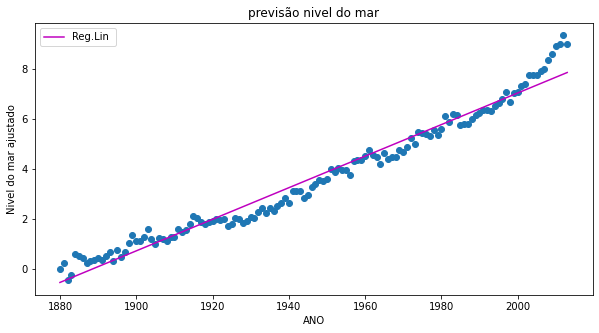

In [137]:
#plotagem com a regressão
fig, axs = plt.subplots(figsize=(10,5))
plt.scatter(x=df["Year"],y=df["CSIRO Adjusted Sea Level"])
plt.plot(df["Year"], Regression(linr.intercept_,linr.coef_,df[["Year"]]), c="m", label = "Reg.Lin ")

#legendas
plt.title("previsão nivel do mar")
axs.set_xlabel("ANO")
axs.set_ylabel("Nivel do mar ajustado")
plt.legend()

plt.savefig("reglin_ate13")

## Métricas de acertividade do modelo
Para saber o quão bom o nosso modelo foi ajustado existem algumas métricas que nos permitem uma maior precisão para avaliação do desempenho do modelo e comparação com outros modelos. Vamos utilizar para avaliar nosso modelo o R² e do *MSE*

### R-squared (R²) / Coeficiente de Determinação

É uma métrica de correlação que tem duas vantagens: é fácil de calcular e fácil de interpretar. 

Demonstra proporcionalmente o quanto da variação na variável resposta $y$ pode ser explicada pelas  variações das variáveis de entrada $x$ no modelo. Sempre será um valor entre 0 e 1, quanto mais próximo de 1 melhor. E pode ser interpretado como uma porcentagem.

É definido com a equação:

$R^2 = \frac{var(média) - var(modelo)}{var(média)} = 1 - \frac{var(modelo)}{var(média)}$

* var = Variância

In [138]:
from sklearn.metrics import r2_score
r2_score(y_true=df["CSIRO Adjusted Sea Level"],y_pred=Regression(linr.intercept_,linr.coef_,df[["Year"]]))

0.9697466074149554

O modelo é capaz de explicar 96% da variância em torno dele.

### Erro Médio Quadrático / mean Squared Error (*MSE*)
As medidas de erro são usadas para fins comparativos com outros modelos e para ter uma ideia de o quão aceitável está a saída do nosso modelo.


O *MSE* nos diz média do quadrado da diferença entre os valores preditos pela reta e o valor real. bQuanto MENOR o valor da métrica de erro, melhor ajustado está o nosso modelo.

Equação

$MSE = \frac{1}{n} \sum(y - \hat{y})^2$

* $y$: valor real a ser previsto
* $\hat{y}$: valor estimado pelo modelo
* $n$: número de pontos


In [139]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df["CSIRO Adjusted Sea Level"], Regression(linr.intercept_,linr.coef_,df[["Year"]]))

0.18553059803434588

Dado as métricas de avaliação do nosso modelo, observamos que estamos com um modelo bem ajustado

##Extendendo a linha até 2050

Agora que temos um modelo bem definido, vamos  extender nossa janela temporal para criar uma previsão da alteração do nivel do mar até 2050.

In [140]:
#extend year
X_extendido = np.arange(df["Year"].min(), 2051)
pd.DataFrame(X_extendido)[[0]]

,0
0,1880
1,1881
2,1882
3,1883
4,1884
...,...
166,2046
167,2047
168,2048
169,2049


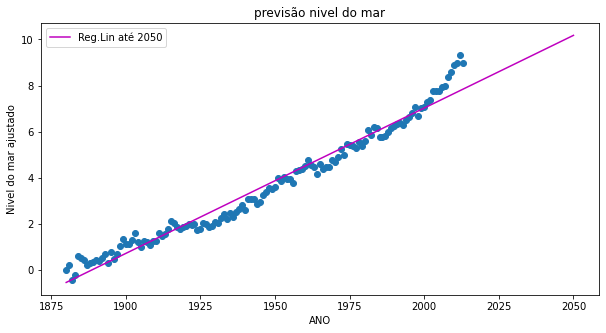

In [141]:
#plotagem com a regressão
fig, axs = plt.subplots(figsize=(10,5))
plt.scatter(x=df["Year"],y=df["CSIRO Adjusted Sea Level"])
plt.plot(X_extendido, Regression(linr.intercept_,linr.coef_,pd.DataFrame(X_extendido)), c="m",label="Reg.Lin até 2050")

#legendas
plt.title("previsão nivel do mar")
axs.set_xlabel("ANO")
axs.set_ylabel("Nivel do mar ajustado")
plt.savefig("reglin_ate50")
plt.legend()

In [142]:
#Valor predito em 2050
Regression(linr.intercept_,linr.coef_,df[["Year"]])[-1]

array([7.84280565])

## Prevendo com dados de 2000 até 2013

No gráfico acima percebe-se que ocorre um crescimento mais acentuado dos valores por volta do ano 2000. Vamos criar um novo modelo somente com os dados de 200 até 2013 para podermos observar melhor o impacto que esta alteração pode causar até 2050.

In [143]:
#dataset e modelo
df2k = df[df["Year"]>=2000]

linr2k = LinearRegression()
linr2k.fit(X=df2k[["Year"]],y=df2k[["CSIRO Adjusted Sea Level"]])

#extend ano
X_extendido2k = np.arange(df2k.Year.min(), 2051 )

falar dos coeficientes e que ja era esperado um aumento do slope

In [144]:
linr2k.coef_

array([[0.16642727]])

Podemos observar que o valor encontrado no nosso modelo de 2000 até 2013 possui um valor para o coeficiente angular ```coef_``` de ```0.16```, bem maior que o valor do modelo anterior de ```0.6```.
Oque já era esperado, pois foi observado um aumento da inclinação dos pontos observados. Uma menor variação no eixo X Ano, causou uma maior variação no eixo Y Variação do nível do mar 

Vamos plotar esses dados para observar a diferença

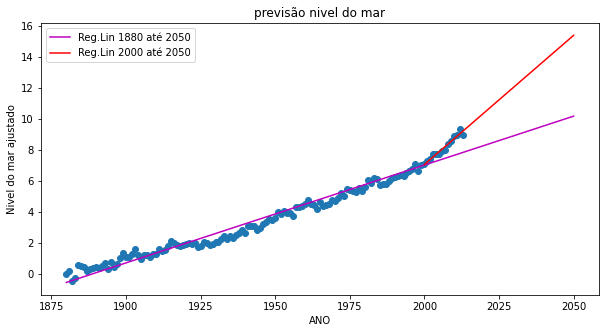

In [145]:
#plotando o gráfico com as duas linhas
fig, axs = plt.subplots(figsize=(10,5))
plt.scatter(x=df["Year"],y=df["CSIRO Adjusted Sea Level"])
plt.plot(X_extendido, Regression(linr.intercept_,linr.coef_,pd.DataFrame(X_extendido)), c="m",label="Reg.Lin 1880 até 2050")

plt.plot(X_extendido2k, Regression(linr2k.intercept_,linr2k.coef_,pd.DataFrame(X_extendido2k)), c="r", label="Reg.Lin 2000 até 2050")

#legendas
plt.title("previsão nivel do mar")
axs.set_xlabel("ANO")
axs.set_ylabel("Nivel do mar ajustado")
plt.legend()
plt.savefig("reglin_2modelos")

In [147]:
#Valor predito em 2050
Regression(linr2k.intercept_,linr2k.coef_,pd.DataFrame(X_extendido2k))[-1]

array([15.38244352])